# 01. Linear Regression — 從數學到 PyTorch

## 0. Notebook Header
- 作者：Paul Yang
- 目的：作為深度學習學習系列的第一章
- 學會什麼：模型、Loss、GD、Numpy、PyTorch

## 1. Linear Regression 是什麼？
- 問題:給$x$， 要預測$y$
- 模型: $$y = wx + b$$

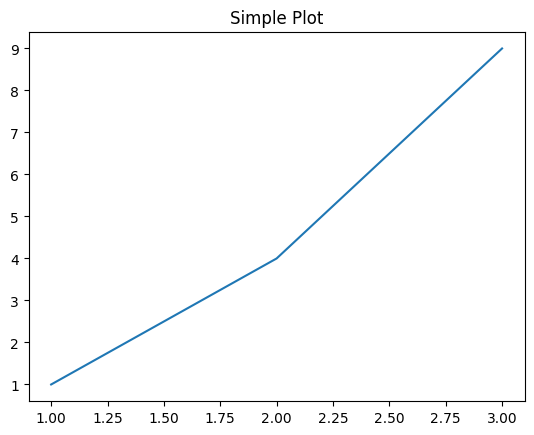

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot([1, 2, 3], [1, 4, 9])
ax.set_title("Simple Plot")
plt.show()

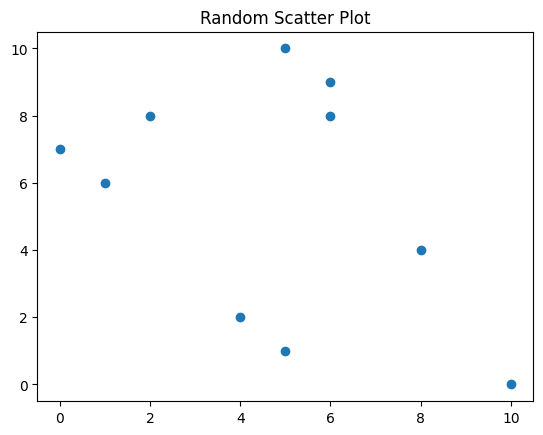

In [4]:
import matplotlib.pyplot as plt
import random

fig, ax = plt.subplots()
x = [random.randint(0, 10) for _ in range(10)]
y = [random.randint(0, 10) for _ in range(10)]
ax.scatter(x, y)
ax.set_title("Random Scatter Plot")
plt.show()

In [13]:
output = 0
weight = random.random()
input = 0
bias = random.random()
output = weight * input + bias

In [14]:
def linear_regression(input, weight, bias):
    return weight * input + bias # Output calculation

## 2. MSE Loss（均方誤差）
$$l^{(i)}(w, b) = \frac{1}{2} \left( \hat{y}^{(i)} - y^{(i)} \right)^2$$
$$L(w, b) = \frac{1}{n} \sum_{i=1}^{n} l^{(i)}(w, b)
        = \frac{1}{n} \sum_{i=1}^{n} \frac{1}{2} \left( w^\top x^{(i)} + b - y^{(i)} \right)^2$$


In [15]:
def loss_function(output_True, output_Pred):
    return((output_True - output_Pred) ** 2)/2

In [ ]:
def MSE(targets, outputs):
    total_loss = 0
    for i in range(len(outputs)):
        total_loss += loss_function(outputs[i], targets[i])
    return total_loss / len(outputs)

## 3.手算 Gradient（最重要的理解）
$$w \leftarrow w - \eta \, \nabla_w L(w,b)$$
$$b \leftarrow b - \eta \, \nabla_b L(w,b)$$

在最小化損失函數時，對權重向量 $w$ 進行更新所需的量為梯度（Gradient）。

$$\nabla_{w}\, l^{(i)}(w,b)$$


表示「針對第 $i$ 筆資料的 Loss 所計算出的梯度」。  
它反映了單筆資料對整體參數更新方向的貢獻。

在梯度下降（Gradient Descent）中，我們以下公式更新參數：

$$ w \leftarrow w - \eta \, \nabla_{w} L(w,b) $$

其中，$\eta$（eta）稱為 $\textbf{學習率（Learning Rate）}$，控制每次更新的步伐大小。

整體損失函數的梯度為

$$ \nabla_{w} L(w,b) = \frac{1}{n} \sum_{i=1}^{n} \nabla_{w}\, l^{(i)}(w,b)$$

代表「將所有樣本的梯度平均」後得到的真正用來更新模型參數的梯度。


In [17]:
gradient = random.random()
learning_rate = 0.01
def update_parameter(parameter, gradient, learning_rate):
    return parameter - learning_rate * gradient

### 線性回歸（Linear Regression）MSE Loss 微分推導（完整）

**1. 單筆資料的 Loss 定義**

$$
l^{(i)}(w,b)
= \frac{1}{2}\left( w^\top x^{(i)} + b - y^{(i)} \right)^2
$$

定義預測值：

$$
\hat{y}^{(i)} = w^\top x^{(i)} + b
$$

---
**2. 對 ( w ) 求偏導數（Gradient w.r.t. w）**

Step 1：重寫 Loss

$$
l^{(i)}
= \frac{1}{2}(\hat{y}^{(i)} - y^{(i)})^2
$$

Step 2：使用鏈式法則

$$
\frac{\partial l^{(i)}}{\partial w}
= (\hat{y}^{(i)} - y^{(i)}) \cdot
\frac{\partial \hat{y}^{(i)}}{\partial w}
$$

Step 3：因為

$$
\hat{y}^{(i)} = w^\top x^{(i)} + b
$$

所以：

$$
\frac{\partial (w^\top x^{(i)})}{\partial w} = x^{(i)}
$$

Step 4：合併得到最終結果

$$
\nabla_w l^{(i)}
= (\hat{y}^{(i)} - y^{(i)}) , x^{(i)}
$$

---

**3. 對 ( b ) 求偏導數（Gradient w.r.t. b）**

因為：

$$
\frac{\partial \hat{y}^{(i)}}{\partial b} = 1
$$

所以：

$$
\nabla_b l^{(i)}
= (\hat{y}^{(i)} - y^{(i)})
$$

---

**4. 整個資料集的 Loss（平均）**

$$
L(w,b)
= \frac{1}{n} \sum_{i=1}^{n}
\frac{1}{2} \left( w^\top x^{(i)} + b - y^{(i)} \right)^2
$$

---

## **5. 對整個 Loss 求梯度（平均後）**

對 ( w )：

$$
\nabla_w L(w,b)
= \frac{1}{n}\sum_{i=1}^n
(\hat{y}^{(i)} - y^{(i)}) , x^{(i)}
$$

對 ( b )：

$$
\nabla_b L(w,b)
= \frac{1}{n}\sum_{i=1}^n
(\hat{y}^{(i)} - y^{(i)})
$$

---

## **6. 梯度下降更新規則（Gradient Descent Update）**

對 ( w )：

$$
w \leftarrow w - \eta , \nabla_w L(w,b)
$$

對 ( b )：

$$
b \leftarrow b - \eta , \nabla_b L(w,b)
$$

In [35]:
def full_batch(inputs, outputs, targets):
    n = len(outputs)
    gradient_w = 0
    gradient_b = 0
    for i in range(n):
        error = outputs[i] - targets[i]
        gradient_w += error * inputs[i]
        gradient_b += error
    gradient_w /= n
    gradient_b /= n
    return gradient_w, gradient_b

## 4. 用 Python for-loop 實作

In [45]:
# x input list
# y output list(target)
def train_linear_regression(x, y, epochs, learning_rate):
    weight = random.random()
    bias = random.random()
    loss_history = []
    for epoch in range(epochs):
        outputs = [linear_regression(xi, weight, bias) for xi in x]
        loss = MSE(outputs, y)
        loss_history.append(loss)
        gradient_w, gradient_b = full_batch(x, outputs, y)
        weight = update_parameter(weight, gradient_w, learning_rate)
        bias = update_parameter(bias, gradient_b, learning_rate)
        if (epoch + 1) % 100 == 0:
            print(  f"Epoch {epoch+1}/{epochs}, Loss: {loss}, Weight: {weight}, Bias: {bias}" )
    return weight, bias, loss_history

In [46]:
weight, bias, loss_history = train_linear_regression(x, y, epochs=1000, learning_rate=0.01)

Epoch 100/1000, Loss: 9.230414670450317, Weight: 0.41492296626476916, Bias: 2.0002630200820266
Epoch 200/1000, Loss: 7.325202419648702, Weight: 0.2052927588996658, Bias: 3.3573297352476033
Epoch 300/1000, Loss: 6.2245667489590275, Weight: 0.045960404673084744, Bias: 4.388787163485872
Epoch 400/1000, Loss: 5.5887326684859415, Weight: -0.07514236683335901, Bias: 5.172760725270628
Epoch 500/1000, Loss: 5.2214131379116475, Weight: -0.16718821237259068, Bias: 5.7686307328454856
Epoch 600/1000, Loss: 5.009213695187638, Weight: -0.2371489372646816, Bias: 6.221530018274122
Epoch 700/1000, Loss: 4.886626683759259, Weight: -0.2903235590931122, Bias: 6.56576241818393
Epoch 800/1000, Loss: 4.81580851770739, Weight: -0.3307396698603739, Bias: 6.827401040632892
Epoch 900/1000, Loss: 4.77489706563337, Weight: -0.36145849687567305, Bias: 7.02626311397324
Epoch 1000/1000, Loss: 4.751262636727385, Weight: -0.38480676852481766, Bias: 7.177410998192586


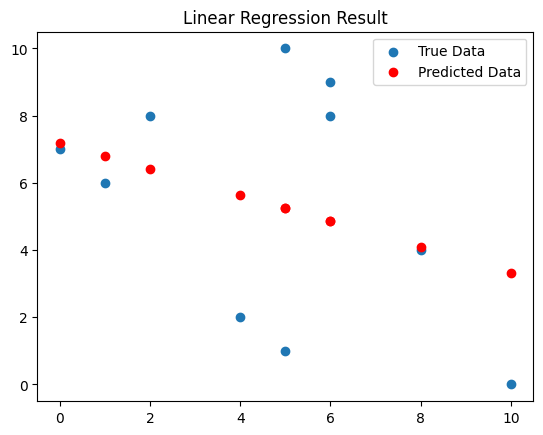

In [47]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
y_pred = [linear_regression(xi, weight, bias) for xi in x]
ax.scatter(x, y, label='True Data')
ax.scatter(x, y_pred, color='red', label='Predicted Data')
ax.set_title("Linear Regression Result")
ax.legend()
plt.show()

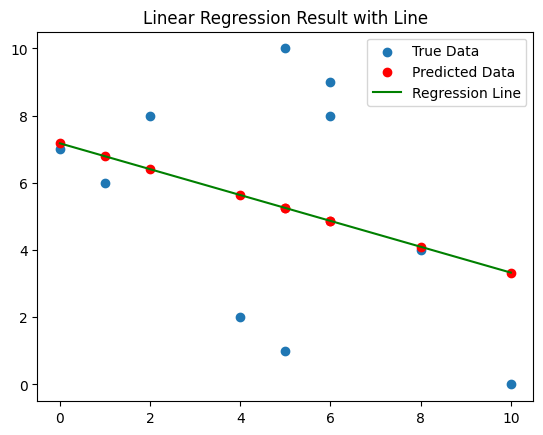

In [48]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
y_pred = [linear_regression(xi, weight, bias) for xi in x]
ax.scatter(x, y, label='True Data')
ax.scatter(x, y_pred, color='red', label='Predicted Data')
x_sorted = sorted(x)
y_pred_sorted = [linear_regression(xi, weight, bias) for xi in x_sorted]
plt.plot(x_sorted, y_pred_sorted, color='green', label='Regression Line')
ax.set_title("Linear Regression Result with Line")
ax.legend()
plt.show()

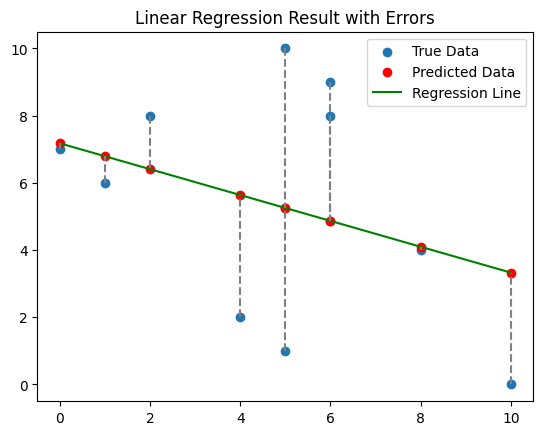

In [49]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
y_pred = [linear_regression(xi, weight, bias) for xi in x]
ax.scatter(x, y, label='True Data')
ax.scatter(x, y_pred, color='red', label='Predicted Data')
x_sorted = sorted(x)
y_pred_sorted = [linear_regression(xi, weight, bias) for xi in x_sorted]
plt.plot(x_sorted, y_pred_sorted, color='green', label='Regression Line')
# plt.plot([x_sorted, x_sorted], [y_pred_sorted, y], color='gray', linestyle='--', label='Errors')
for xi, yi_true, yi_pred in zip(x, y, y_pred):
    plt.plot([xi, xi], [yi_true, yi_pred], color='gray', linestyle='--')
ax.set_title("Linear Regression Result with Errors")
ax.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


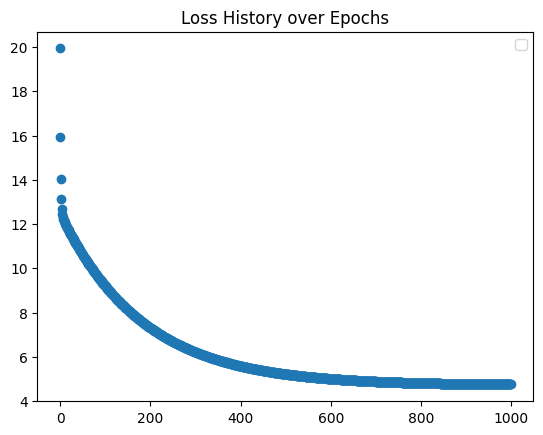

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter([i for i in range(len(loss_history))], loss_history)
ax.set_title("Loss History over Epochs")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.legend()
plt.show()

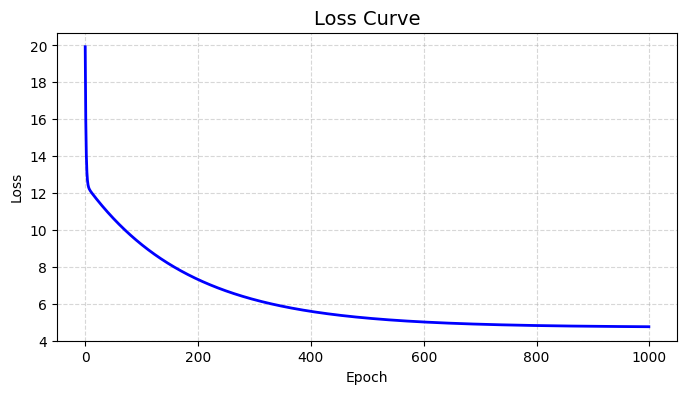

In [53]:
plt.figure(figsize=(8, 4))
plt.plot(loss_history, color='blue', linewidth=2)
plt.title("Loss Curve", fontsize=14)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


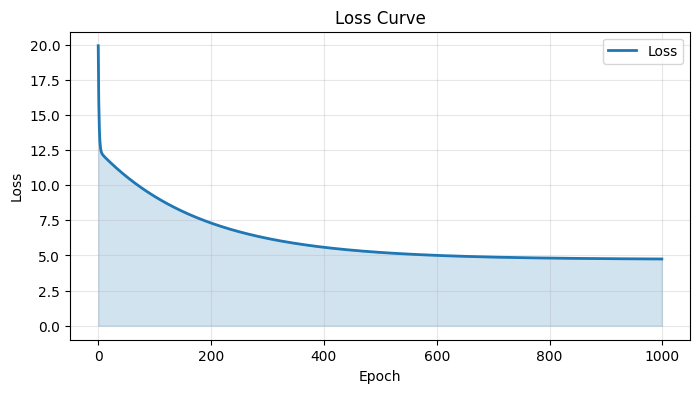

In [54]:
plt.figure(figsize=(8,4))
plt.plot(loss_history, label="Loss", color="#1f77b4", linewidth=2)
plt.fill_between(range(len(loss_history)), loss_history, alpha=0.2, color="#1f77b4")
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


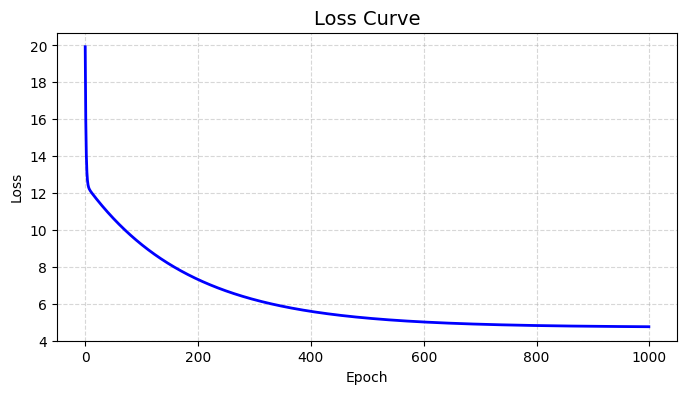

In [55]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(loss_history, color='blue', linewidth=2)

ax.set_title("Loss Curve", fontsize=14)
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.grid(True, linestyle="--", alpha=0.5)

plt.show()